# Data Exploration

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [7]:
import os
print(os.getcwd())

g:\Github\NLP\Hate=speech-sinhala


In [8]:
df = pd.read_csv('Dataset\sinhala-hate-speech-dataset.csv')
#encoding='utf8'
df.head(n=10)

,id,comment,label
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0
1,2,18ක පෙනුමක් තියෙන්නේ,0
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0
3,4,25 කැල්ල..හම්මෝ..,0
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1
5,6,25 ක් වගේ ???ඉතින් වැලලියන්,1
6,7,25 ලුක් එක දැකල ඔලුව සවුත්තු උන තරිදු...,0
7,8,25ක පෙනුමක් කියපු කෑල්ලේ ඉදන් බලන එක නතර කලා,0
8,9,33ක් ගුවන්තොටුපළවල ලෝකයේ හිරවෙලා ඉන්නවා ඩුබායි...,0
9,10,5 දෙනා කිව්වෙ මේ පස්දෙනාද..,0


## Misisng values

In [10]:
count = df.isna().sum()
precentange = df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
id,0,0.0
comment,0,0.0
label,0,0.0


## Distribution

In [11]:
df.groupby(['label'])['label'].describe()[['count']]

,count
label,
0,2890.0
1,3455.0


1    54.452325
0    45.547675
Name: label, dtype: float64

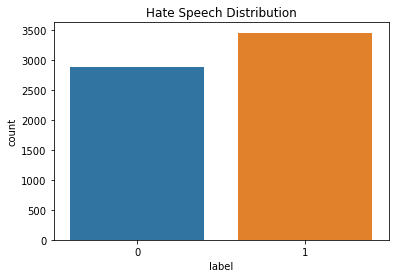

In [12]:
sns.countplot(x='label', data=df).set_title('Hate Speech Distribution')
df.label.value_counts(normalize=True) * 100

## Comment length

In [13]:
df['length'] = df['comment'].apply(len)
df.head()

,id,comment,label,length
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0,31
1,2,18ක පෙනුමක් තියෙන්නේ,0,21
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0,48
3,4,25 කැල්ල..හම්මෝ..,0,17
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1,33


## Comment Length Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F61132D288>,
      dtype=object)

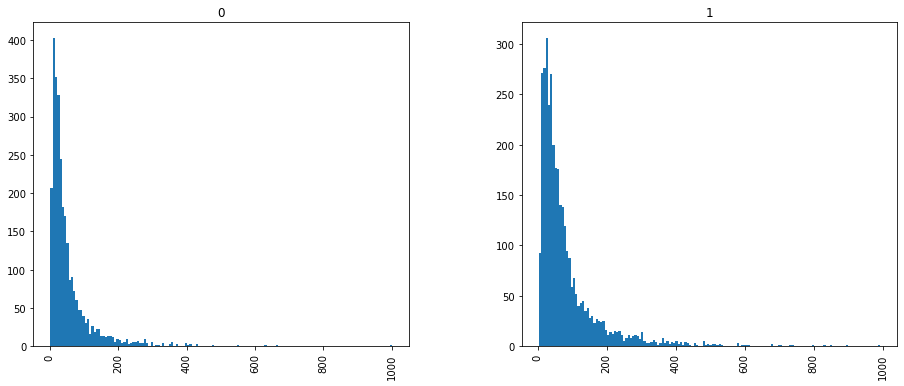

In [14]:

df.hist(column='length',by='label',figsize=(15,6), bins=150)


In [15]:
exclude = set(",.:;'\"-?!/´`%")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

## Remove puntuation

In [16]:
df['cleaned'] = df['comment'].apply(lambda x: removePunctuation(x))
df.head()

,id,comment,label,length,cleaned
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0,31,හුදෙකලා එකේ ද ඇහෙනවද කාටහරි
1,2,18ක පෙනුමක් තියෙන්නේ,0,21,18ක පෙනුමක් තියෙන්නේ
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0,48,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට
3,4,25 කැල්ල..හම්මෝ..,0,17,25 කැල්ල හම්මෝ
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1,33,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ


## Remove numbers

In [17]:
df['cleaned'] = df['cleaned'].apply(lambda x: removeNumbers(x))
df.head()

,id,comment,label,length,cleaned
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0,31,හුදෙකලා එකේ ද ඇහෙනවද කාටහරි
1,2,18ක පෙනුමක් තියෙන්නේ,0,21,ක පෙනුමක් තියෙන්නේ
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0,48,එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට
3,4,25 කැල්ල..හම්මෝ..,0,17,කැල්ල හම්මෝ
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1,33,කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ


## Most Common words in Dataset

In [18]:
from collections import Counter

plt.rc('font', family='Lohit Devanagari')

results = Counter()
df.cleaned.str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('මේ', 933), ('වගේ', 584), ('එපා', 528), ('තෝ', 469), ('නෑ', 415), ('එක', 387), ('ලංකාවට', 381), ('අපේ', 376), ('අපි', 348), ('කියලා', 339)]


## Most common words in Hate label

In [19]:
words = [word for i in df[df['label'] == 1]['cleaned'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[('මේ', 586),
 ('තෝ', 465),
 ('වගේ', 441),
 ('එපා', 429),
 ('ලංකාවට', 332),
 ('නෑ', 275),
 ('තොට', 255),
 ('කියලා', 250),
 ('පට්ට', 237),
 ('එන්න', 236),
 ('ගොන්', 235),
 ('බැල්ලි', 231),
 ('රටට', 231),
 ('අපේ', 227),
 ('තොපි', 224),
 ('ඉන්න', 217),
 ('රට', 207),
 ('අනේ', 206),
 ('අපි', 202),
 ('උබ', 199)]

## Most Common words in Non hate label

In [20]:
words = [word for i in df[df['label'] == 0]['cleaned'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[('මේ', 347),
 ('එක', 194),
 ('ඒ', 192),
 ('ඔබ', 188),
 ('අපේ', 149),
 ('අපි', 146),
 ('වගේ', 143),
 ('එකක්', 143),
 ('නෑ', 140),
 ('කරන්න', 138),
 ('සරණයි', 123),
 ('නම්', 110),
 ('කරන', 110),
 ('ඉන්න', 109),
 ('රට', 102),
 ('එපා', 99),
 ('තෙරුවන්', 93),
 ('ඒක', 90),
 ('කියලා', 89),
 ('සියලු', 88)]